# Merge sources and explore the data

Just some initial exploration of the data in progress. 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

### Read in Jessica's data

In [2]:
j = pd.read_csv('jessica.tsv')

In [3]:
j.shape

(1200, 18)

In [4]:
j.head()

,docid,author,realname,pseudonym,gender,nationality,authordate,inferreddate,firstpub,latestcomp,allcopiesofwork,copiesin25yrs,enumcron,imprint,genres,subjects,shorttitle,category
0,mdp.49015000838012,"Fraser, Peter",NaN,NaN,m,us,1932-,1971,1971.0,1971,1,1,NaN,Boston|Plays inc.|1971,Bibliographies|NotFiction,Puppet theater,Puppet circus,nonfic
1,mdp.39015063561586,"Ferrier, Susan","Ferrier, Susan Edmonstone",NaN,f,uk,1782-1854.,1818,1818.0,1818,5,3,v.2,Edinburgh;W. Blackwood an,Bibliographies|Fiction,English fiction,"Marriage, a novel",novel
2,uiuo.ark+=13960=t8nc6b618,"Neri, Mary Anne","Neri, Mary Anne",NaN,f,it,NaN,1804,1804.0,1804,1,1,v.1,London;Printed for T. Cad,Novel|Fiction,NaN,The eve of San-Pietro,novel
3,uc1.$b473613,"Mann, Erika","Mann, Erika",NaN,f,de,1905-1969.,1940,NaN,1940,1,1,NaN,New York|Toronto|Farrar &,NotFiction,Social life and customs,The lights go down,novel
4,nyp.33433074931597,"Forrester, Charles Robert","Forrester, Charles Robert","Crowquill, Alfred; Willis, Hal",m,uk,1803-1850.,1843,NaN,1843,2,2,v. 2,London;R. Bentley;1843.,NotFiction,NaN,Phantasmagoria of fun,juvenile


### Read in Patrick's data

In [5]:
p = pd.read_csv('patrick.tsv', sep = '\t')

In [6]:
p.shape

(1200, 1)

Ooops; there's only one column. This is probably a sign that there aren't any tabs in the file; it's gotten accidentally saved as a csv, which happens very easily on Windows.

That's fine, actually, and maybe we shouldn't worry about it, because it's easily addressed.

In [7]:
p = pd.read_csv('patrick.tsv')
p.shape

(1200, 18)

There, solved.

In [8]:
p.head()

,docid,author,realname,pseudonym,gender,nationality,authordate,inferreddate,firstpub,latestcomp,allcopiesofwork,copiesin25yrs,enumcron,imprint,genres,subjects,category,shorttitle
0,nyp.33433076025596,"M'Henry, James","McHenry, James",NaN,m,us,1785-1845.,1848,1823.0,1845,1,1,v. 1-2,Pittsburgh;M. P. Morse;18,NaN,1732-1799|Fiction|Washing,novel,"The wilderness : or, Braddock's times; A tale ..."
1,wu.89087902169,"Applin, Arthur",NaN,"Smith, Julian",m,uk,1883-,1929,NaN,1929,1,1,NaN,New York|H. Liveright|192,NotFiction,NaN,novel,The chronicles of a gigolo
2,uc1.$b323629,"March, William",NaN,NaN,m,us,1893-1954.,1939,NaN,1939,2,2,NaN,"Boston|Little, Brown and",NotFiction,NaN,shortstories,Some like them short
3,uc1.$b318317,"Rosny, J. H., aÃ®nÃ©, pseud. of J. H. BoÃ«x","Boex, Joseph Henri Honoré",Rosny aîné,m,fr,1856-1940.,1924,NaN,1924,1,1,NaN,New York|R. M. McBride|19,NotFiction,NaN,novel,"The giant cat; or, The quest of Aoun and Zouhr"
4,mdp.39015005144137,"von Strassburg, Gottfried",NaN,NaN,u,NaN,d. 1210,1960,NaN,1960,1,1,NaN,Baltimore|Penguin Books|1,NotFiction,Tristan|(Anglo-Norman poe,reprint,Tristan


### Explore format and allowable values

In [9]:
# Do the files have the same columns in the same order?

list(p.columns) == list(j.columns)

False

In [10]:
set(p.columns) == set(j.columns)

True

No, but they have the same columns, just in a different order. I think it's mainly that "category" and "shorttitle" are reversed at the end. That's fine; the mere ordering of columns won't bother Pandas at all.

#### gender

According to our data model in **process.md** [https://github.com/tedunderwood/meta2018/blob/master/process.md](https://github.com/tedunderwood/meta2018/blob/master/process.md), the only allowable values here are m(ale), f(emale), u(nknown), and o(ther).

What values do we actually have?

In [11]:
set(j.gender)

{nan, 'o', 'u', 'm', 'f'}

In [12]:
set(p.gender)

{nan, 'u', 'm', 'f'}

The multiple values in Jessica's table should probably be simplified. If these are multiple-author situations, and the authors have different genders, just go with **o**ther.

If they have the same gender, go with **m** or **f**. Don't use pipes "|" in this column.

Same thing applies to "us | us" below. Remember that these datasets are going to be interpreted mostly by computers, not human beings. The computer won't know what to make of the pipe separator "|" unless I tell it to expect pipes in this column, and tell it what to do when it encounters one. So we only want to use pipes in columns where we have an explicit plan to do so.

#### nationality

In [13]:
set(j.nationality)

{nan,
 'si',
 'aus',
 'uk',
 'uy',
 'us| us',
 'mal',
 'th',
 'au',
 'po',
 'fr',
 'ca',
 'ir',
 'ch',
 'us',
 'de',
 'pk',
 'in',
 'ma',
 'es',
 'sa',
 'swe',
 'ger',
 'cu',
 'jp',
 'sau',
 'cmr',
 'ko',
 'ru',
 'ne',
 'no',
 'be',
 'swi',
 'ni',
 'is',
 'fi',
 'uk ',
 'ukr',
 'gk',
 'it',
 'me',
 'le',
 'pr',
 'pl'}

In [14]:
set(p.nationality)

{nan,
 'ph',
 'aus',
 'uk',
 'gr',
 'rom',
 'au',
 'fr',
 'ca',
 'sri',
 'den',
 'ir',
 'us',
 'iran',
 'de',
 'in',
 'cl',
 'es',
 'sa',
 'jp',
 'al',
 'ba',
 'cmr',
 'tr',
 'ru',
 'nor',
 'pol',
 'lit',
 'tu',
 'no',
 'swi',
 'ni',
 'nz',
 'arm',
 'hun',
 'ar',
 'ukr',
 'sw',
 'gk',
 'it',
 'nic',
 'tri',
 'me',
 'pr'}

#### category

According to our data dictionary in **process.md** [https://github.com/tedunderwood/meta2018/blob/master/process.md](https://github.com/tedunderwood/meta2018/blob/master/process.md) the allowable codes here are

    nonfic
    reprint
    novel
    poetry
    shortstories
    juvenile

In subsequent conversation we added

    drama, and
    shortstories|juvenile
    juvenile|shortstories (order doesn't matter here)
 
What categories are we actually getting?

In [15]:
set(j.category)

{nan,
 'poetry',
 'reprint',
 'nonfic',
 'nonfic | reprint',
 'juvenile',
 'drama',
 'shortstories',
 'juvenile | shortstories',
 'shortstories | poetry',
 'novel'}

In [16]:
set(p.category)

{nan,
 'nonfic|poetry',
 'nonfic|juvenile',
 'poetry',
 'reprint',
 'nonfic',
 'shortstories|juvenile',
 'juvenile|novel',
 'juvenile',
 'novel|juvenile',
 'juvenile|shortstories',
 'shortstories',
 'shortstories|poetry',
 'novel'}

Most of the variants here are no problem. It's normal practice to lowercase everything, and strip spaces, so "Shortstories | juvenile" will be easy to interpret.

But *nonfiction / notfiction / nonfic* are material variants; we want to standardize to *nonfic.*

I can do that quickly now to illustrate.

In [17]:
ctr = 0
# we want to count changes
# so initialize a counter to zero

for idx in j.index:
    # let's go through every row in this dataframe
    # by using the "index" number
    
    this_category = j.loc[idx, 'category']
    # Get the category each time, using the syntax:
    # dataframe.loc[row, column]
    # (loc for location)
    
    if this_category == 'notfiction' or this_category == 'nonfiction':
        # if it's a variant
        
        j.loc[idx, 'category'] = 'nonfic'
        # replace it with the version we expect
        ctr += 1
    
    else:
        # otherwise
        pass       # do nothing
                # this isn't really necessary, but I'm demonstrating
                # if-else syntax

print('We changed ' + str(ctr) + ' rows.')
        

We changed 0 rows.


#### What percentage nonfic?

In [18]:
#### what percentage nonfic?

j_pct = sum(j.category == 'nonfic') / sum(~pd.isnull(j.category))
print("In Jessica's set: ", j_pct)


p_pct = sum(p.category == 'nonfic') / sum(~pd.isnull(p.category))
print("In Patrick's set: ", p_pct)

In Jessica's set:  0.045037531276063386
In Patrick's set:  0.09348914858096828


Pretty close agreement; that makes sense.

#### How often is firstpub filled out?

In [19]:
j_pct = sum(~pd.isnull(j.firstpub)) / sum(~pd.isnull(j.category))
print("In Jessica's set: ", j_pct)

p_pct = sum(~pd.isnull(p.firstpub)) / sum(~pd.isnull(p.category))
print("In Patrick's set: ", p_pct)

In Jessica's set:  0.1517931609674729
In Patrick's set:  0.14524207011686144


That's a pretty dramatic difference, which we need to look into.

13-14% of the time Patrick is able to identify a first publication date earlier than the "inferreddate"; in Jessica's data, it's only happening around 1% of the time.

In [20]:
#### what percentage novel?

j_pct = sum(j.category == 'novel') / sum(~pd.isnull(j.category))
print("In Jessica's set: ", j_pct)

In Jessica's set:  0.7297748123436196


In [21]:
p_pct = sum(p.category == 'novel') / sum(~pd.isnull(p.category))
print("In Patrick's set: ", p_pct)

In Patrick's set:  0.7036727879799666


In [22]:
.7 * 130

91.0

In [23]:
j_pct = sum(p.category == 'reprint') / sum(~pd.isnull(p.category))
print("In Jessica's set: ", j_pct)

In Jessica's set:  0.045075125208681135


In [24]:
all = pd.concat([j, p])
all.head()

/Users/tunder/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':


,allcopiesofwork,author,authordate,category,copiesin25yrs,docid,enumcron,firstpub,gender,genres,imprint,inferreddate,latestcomp,nationality,pseudonym,realname,shorttitle,subjects
0,1,"Fraser, Peter",1932-,nonfic,1,mdp.49015000838012,NaN,1971.0,m,Bibliographies|NotFiction,Boston|Plays inc.|1971,1971,1971,us,NaN,NaN,Puppet circus,Puppet theater
1,5,"Ferrier, Susan",1782-1854.,novel,3,mdp.39015063561586,v.2,1818.0,f,Bibliographies|Fiction,Edinburgh;W. Blackwood an,1818,1818,uk,NaN,"Ferrier, Susan Edmonstone","Marriage, a novel",English fiction
2,1,"Neri, Mary Anne",NaN,novel,1,uiuo.ark+=13960=t8nc6b618,v.1,1804.0,f,Novel|Fiction,London;Printed for T. Cad,1804,1804,it,NaN,"Neri, Mary Anne",The eve of San-Pietro,NaN
3,1,"Mann, Erika",1905-1969.,novel,1,uc1.$b473613,NaN,NaN,f,NotFiction,New York|Toronto|Farrar &,1940,1940,de,NaN,"Mann, Erika",The lights go down,Social life and customs
4,2,"Forrester, Charles Robert",1803-1850.,juvenile,2,nyp.33433074931597,v. 2,NaN,m,NotFiction,London;R. Bentley;1843.,1843,1843,uk,"Crowquill, Alfred; Willis, Hal","Forrester, Charles Robert",Phantasmagoria of fun,NaN


In [25]:
all.shape

(2400, 18)

In [26]:
set(all.category)

{nan,
 'nonfic|poetry',
 'poetry',
 'nonfic|juvenile',
 'reprint',
 'nonfic',
 'shortstories|juvenile',
 'juvenile|novel',
 'nonfic | reprint',
 'juvenile',
 'drama',
 'novel|juvenile',
 'juvenile|shortstories',
 'shortstories',
 'shortstories|poetry',
 'juvenile | shortstories',
 'shortstories | poetry',
 'novel'}

In [27]:
def isfiction(astring):
    if pd.isnull(astring):
        return 'non'
    
    if 'novel' in astring or 'shortstories' in astring:
        if 'juvenile' in astring:
            return 'juv'
        else:
            return 'fic'
    elif 'juvenile' in astring:
        return 'juv'
    else:
        return 'non'

all = all.assign(isfic = all.category.map(isfiction))

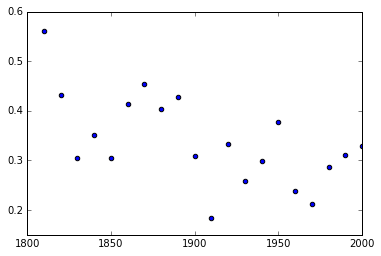

[46, 32, 25, 32, 21, 36, 34, 36, 39, 26, 15, 31, 23, 26, 34, 20, 20, 23, 28, 32]


In [37]:
timeaxis = []
percentages = []
raw = []
for decade in range(1805, 2000, 10):
    in_decade = all.loc[(all.inferreddate >= decade) & (all.inferreddate < (decade + 10)) & ((all.isfic == 'fic')), : ]
    all_genders = sum(in_decade.gender == 'm') + sum(in_decade.gender == 'f')
    feminine = sum(in_decade.gender == 'f')
    pct = feminine / all_genders
    timeaxis.append(decade + 5)
    percentages.append(pct)
    raw.append(feminine)

plt.scatter(timeaxis, percentages)
plt.xlim(1800,2000)
plt.show() 
print(raw)

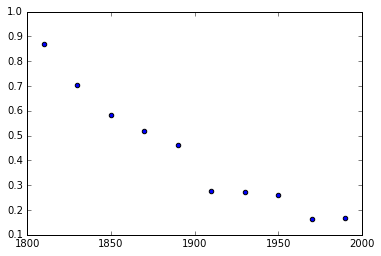

[107, 92, 74, 64, 58, 33, 38, 37, 21, 22]


In [29]:
timeaxis = []
percentages = []
raw = []
for decade in range(1800, 2000, 20):
    in_decade = all.loc[(all.inferreddate > decade) & (all.inferreddate < (decade + 20)) & (all.category == 'novel'), : ]
    all_nations = sum(~pd.isnull(in_decade.nationality))
    uk = sum(in_decade.nationality == 'uk')
    pct = uk / all_nations
    timeaxis.append(decade + 10)
    percentages.append(pct)
    raw.append(uk)

plt.scatter(timeaxis, percentages)
plt.show() 
print(raw)

In [30]:
sum(pd.isnull(j.category))

1

In [33]:
def isjuvie(astring):
    if pd.isnull(astring):
        return 'adult'
    
    if 'juvenile' in astring:
        return 'juv'
    else:
        return 'adult'

all = all.assign(isjuv = all.category.map(isjuvie))

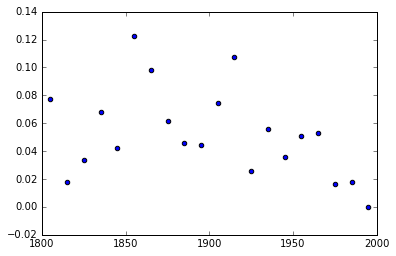

[0.22222219753086697, 0.499999750000125, 0.9999997500000625, 0.4999999375000079, 0.199999960000008, 0.42857139795918586, 0.7272726611570308, 0.57142848979593, 0.399999920000016, 0.399999920000016, 0.6249999218750099, 0.5384614970414233, 0.6666664444445185, 0.49999991666668053, 0.9999997500000625, 0.8333331944444675, 0.8333331944444675, 0.499999750000125, 0.99999950000025, 0.0]


In [36]:
timeaxis = []
percentages = []
womenjuv = []
for decade in range(1800, 2000, 10):
    in_decade = all.loc[(all.inferreddate >= decade) & (all.inferreddate < (decade + 10)), : ]
    all_books = len(in_decade.category)
    juvie = sum(in_decade.isjuv == 'juv')
    pct = juvie / all_books
    timeaxis.append(decade + 5)
    percentages.append(pct)
    wj = sum((in_decade.isjuv == 'juv') & (in_decade.gender == 'f'))
    womenjuv.append(wj / (juvie + .000001))

plt.scatter(timeaxis, percentages)
plt.xlim(1800,2000)
plt.show() 
print(womenjuv)